# Exploring Ebay Car Sales Data in Year 2016

In this guided project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The data dictionary provided with data is as follows:

- dateCrawled - When this ad was first crawled. All field-values are taken from this date.
- name - Name of the car.
- seller - Whether the seller is private or a dealer.
- offerType - The type of listing 
- price - The price on the ad to sell the car.
- abtest - Whether the listing is included in an A/B test.
- vehicleType - The vehicle Type.
- yearOfRegistration - The year in which the car was first registered.
- gearbox - The transmission type.
- powerPS - The power of the car in PS.
- model - The car model name.
- kilometer - How many kilometers the car has driven.
- monthOfRegistration - The month in which the car was first registered.
- fuelType - What type of fuel the car uses.
- brand - The brand of the car.
- notRepairedDamage - If the car has a damage which is not yet repaired.
- dateCreated - The date on which the eBay listing was created.
- nrOfPictures - The number of pictures in the ad.
- postalCode - The postal code for the location of the vehicle.
- lastSeenOnline - When the crawler saw this ad last online.

## Summary

- There is no relationship between mileage and price
- Brand has an influence on price.  Audi, BMW, and MC have the highest mean price as they are luxury branded cars vs Ford, Opel
- Local auto makers are favored.  Approximately 50% of listings are German brands.
    - volkswagen (21.25%)
    - bmw (10.88%)
    - opel (10.83%)
    - mercedes_benz (09.58%)
    - audi (08.61%)
    - ford (06.98%)
- 97.9% of cars were registered in the last three decades.

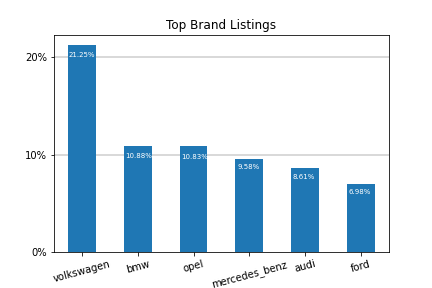

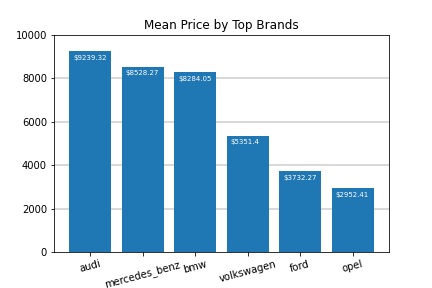

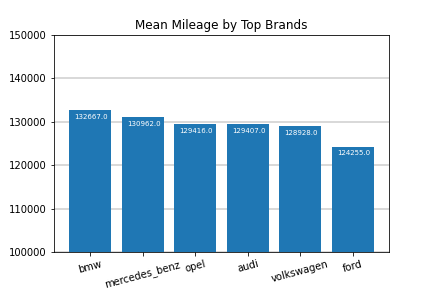

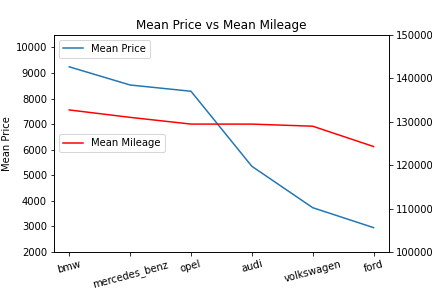

In [366]:
#Display Visualizations
x1 = Image(filename='top_brands.png')
x2 = Image(filename='mean_price.png')
y1 = Image(filename='mean_mileage.png')
y2 = Image(filename='mean_compare.png')
display(x1, x2, y1, y2)

## Project

We will start by importing libraries and reading in the data

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import display
%matplotlib inline

autos = pd.read_csv('autos.csv', encoding = 'Latin-1')

In [368]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [369]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

Here we can make the following observations:
- The dataset has 20 columns, most are strings
- Some columns have null values, no more than 20%
- Column names are using camelcase

## Cleaning

<br>Below we change some of the column names to make it easier to understand. And convert the column labels from camel case to snake case to make it easier to read

In [370]:
new_headers = []

def to_snake_case(col):
    if col == 'yearOfRegistration':
        col = 'registration_year'
        return col
    elif col == 'monthOfRegistration':
        col = 'registration_month'
        return col
    elif col == 'notRepairedDamage':
        col = 'unrepaired_damage'
        return col
    elif col == 'dateCreated':
        col = 'ad_created'
        return col
    elif col == 'powerPS':
        col = 'power_ps'
        return col
    else:
        snake = col[0].lower()
        for char in col[1:]:
            if char in ('ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
                snake += '_' + char.lower()
            else:
                snake += char
        return snake
    
    
for each in autos.columns:
    column = to_snake_case(each)
    new_headers.append(column)
    

autos.columns = new_headers

autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


<br>With the column headers easier to understand, Let's dig deeper into each column by looking at their attributes and basic stats.

In [371]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 15:49:30,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


## Cleaning Price and Odometer

A few observations:
- Looking at price and odometer, they are stored as text because the statistics output a NaN value
- We will have to investigate further into a few columns, such as registration year (max 9999, min 0), power_ps (max 17700)


<br> We will start with odometer and price.  We can rename the column header to odometer_km and remove the 'km' text from the values to convert it to a numeric type.  The same method will also be applied to price.

In [372]:
autos['odometer'] = autos['odometer'].str.replace('km', '')
autos['odometer'] = autos['odometer'].str.replace(',', '')
autos['price'] = autos['price'].str.replace('$', '')
autos['price'] = autos['price'].str.replace(',', '')
autos['price'] = autos['price'].astype(int)
autos['odometer']= autos['odometer'].astype(int)
autos.rename(columns = {'odometer':'odometer_km'},inplace = True)
print(autos.dtypes)

date_crawled          object
name                  object
seller                object
offer_type            object
price                  int64
abtest                object
vehicle_type          object
registration_year      int64
gearbox               object
power_ps               int64
model                 object
odometer_km            int64
registration_month     int64
fuel_type             object
brand                 object
unrepaired_damage     object
ad_created            object
nr_of_pictures         int64
postal_code            int64
last_seen             object
dtype: object


<br> Now lets explore the odo and price column for unrealistic values that we might want to exclude from our analysis

In [373]:
print(autos["price"].unique().shape)
print(autos["price"].describe())
print(autos["price"].value_counts().sort_index(ascending= True).head(20))
print(autos["price"].value_counts().sort_index(ascending= True).tail(20))

(2357,)
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64
0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price, dtype: int64
197000      1
198000      1
220000      1
250000      1
259000      1
265000      1
295000      1
299000      1
345000      1
350000      1
999990      1
999999      2
1234566     1
1300000     1
3890000     1
10000000    1
11111111    2
12345678    3
27322222    1
99999999    1
Name: price, dtype: int64


<br> As shown above, 1421 cars are listed with a price of 0.  We will remove them from our analysis.  On the top end, we will be removing values above 350,000 also. 

In [374]:
autos = autos[(autos['price'] > 0) & (autos['price'] < 351000)]
autos.describe()

,price,registration_year,power_ps,odometer_km,registration_month,nr_of_pictures,postal_code
count,48565.000000,48565.000000,48565.000000,48565.000000,48565.000000,48565.0,48565.000000
mean,5888.935591,2004.755421,117.197158,125770.101925,5.782251,0.0,50975.745207
std,9059.854754,88.643887,200.649618,39788.636804,3.685595,0.0,25746.968398
min,1.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1200.000000,1999.000000,71.000000,125000.000000,3.000000,0.0,30657.000000
50%,3000.000000,2004.000000,107.000000,150000.000000,6.000000,0.0,49716.000000
75%,7490.000000,2008.000000,150.000000,150000.000000,9.000000,0.0,71665.000000
max,350000.000000,9999.000000,17700.000000,150000.000000,12.000000,0.0,99998.000000


In [375]:
print(autos["odometer_km"].unique().shape)
print(autos["odometer_km"].describe())
print(autos["odometer_km"].value_counts().sort_index(ascending=False))

(13,)
count     48565.000000
mean     125770.101925
std       39788.636804
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64
150000    31414
125000     5057
100000     2115
90000      1734
80000      1415
70000      1217
60000      1155
50000      1012
40000       815
30000       780
20000       762
10000       253
5000        836
Name: odometer_km, dtype: int64


Observations:
- There are only 13 values for the odometer column.  
- This could be due to ebay only allowing certain intervals.  
- The end point intervals can possibly be inflated, as cars with 200k, 250k, etc are grouped in with the 150k interval.  The same applies for the 5k group, with 0k or new cars.

## Date Crawled, Ad created, Last Seen

Here we explore the date crawled, ad created, and last seen column

In [376]:
crawled = autos['date_crawled'].str[:10]

print(crawled.value_counts(normalize=True, dropna=False).sort_index().head(1))
print(crawled.value_counts(normalize=True, dropna=False).sort_index().tail(1))

print(crawled.value_counts(dropna=False))

2016-03-05    0.025327
Name: date_crawled, dtype: float64
2016-04-07    0.0014
Name: date_crawled, dtype: float64
2016-04-03    1875
2016-03-20    1840
2016-03-21    1815
2016-03-12    1793
2016-03-14    1775
2016-04-04    1772
2016-03-07    1749
2016-04-02    1723
2016-03-28    1693
2016-03-19    1689
2016-03-15    1665
2016-03-29    1656
2016-03-30    1636
2016-04-01    1636
2016-03-08    1617
2016-03-09    1607
2016-03-22    1602
2016-03-11    1582
2016-03-23    1565
2016-03-26    1564
2016-03-10    1563
2016-03-31    1546
2016-03-17    1536
2016-03-25    1535
2016-03-27    1510
2016-03-16    1438
2016-03-24    1425
2016-03-05    1230
2016-03-13     761
2016-03-06     682
2016-04-05     636
2016-03-18     627
2016-04-06     154
2016-04-07      68
Name: date_crawled, dtype: int64


<br>We can see that ads were crawled between 3/5/2016 and 4/7/2016, with the most ads crawled on 4/3/2016 @ 1875 ads 

In [377]:
ad_created = autos['ad_created'].str[:10]
print(ad_created.value_counts(normalize=True, dropna=False).sort_index())
print('\n')
print(ad_created.value_counts(normalize=True, dropna=False))

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64


2016-04-03    0.038855
2016-03-20    0.037949
2016-03-21    0.037579
2016-04-04    0.036858
2016-03-12    0.036755
                ...   
2015-12-30    0.000021
2015-11-10    0.000021
2016-01-22    0.000021
2016-02-17    0.000021
2016-02-11    0.000021
Name: ad_created, Length: 76, dtype: float64


<br>All ads were created between 6/11/2015 and 4/7/2016 and the most ads created was on 4/3/2016

In [378]:
last_seen = autos['last_seen'].str[:10]
print(last_seen.value_counts(normalize=True, dropna=False).sort_index())
print('\n')
print(last_seen.value_counts(dropna=False))

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64


2016-04-06    10772
2016-04-07     6408
2016-04-05     6059
2016-03-17     1364
2016-04-03     1224
2016-04-02     1210
2016-03-30     1203
2016-04-04     1189
2016-03-31     1155
2016

<br>We can see that 4/5/2016, 4/6/2016, and 4/7/2016 are where the most sales occured, however there isn't enough data to convey more information

## Registration Year

Here we explore registration year, and notice that there will be some entries that need to be taken care of

In [379]:
autos['registration_year'].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

<br>Looking at the value for Min (1000) and Max (9999) in registration year, further investigation is required to see what can be cleaned.

In [380]:
print(autos['registration_year'].value_counts(dropna=False).sort_index().head(20))
print(autos['registration_year'].value_counts(dropna=False).sort_index().tail(20))

1000    1
1001    1
1111    1
1800    2
1910    5
1927    1
1929    1
1931    1
1934    2
1937    4
1938    1
1939    1
1941    2
1943    1
1948    1
1950    3
1951    2
1952    1
1953    1
1954    2
Name: registration_year, dtype: int64
2010    1589
2011    1623
2012    1310
2013     803
2014     663
2015     392
2016    1220
2017    1392
2018     470
2019       2
2800       1
4100       1
4500       1
4800       1
5000       4
5911       1
6200       1
8888       1
9000       1
9999       3
Name: registration_year, dtype: int64


<br>We will remove vehicles that show registered before 1910, and after 2017.  Before 1910 as the data is negligible and after 2017 because 2 model years after the 2016 crawl date are not possible.  It is not uncommon for cars models to be a year ahead (A 2021 car can be released during 2020).

In [381]:
#removing imprecise years
autos = autos[(autos['registration_year'] > 1909) & (autos['registration_year'] < 2018)]
print(autos['registration_year'].describe())
print('\n')

print('% of cars registered in the last 30 years:')
print(autos['registration_year'].value_counts(normalize=True, dropna=False).sort_index().tail(30).sum())


count    48073.000000
mean      2003.318724
std          7.464077
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2017.000000
Name: registration_year, dtype: float64


% of cars registered in the last 30 years:
0.9794479229505128


<br>We can see from the calculation above that more than 97% of the cars were registered in the last three decades.

## Analysis: Top Brand Listings

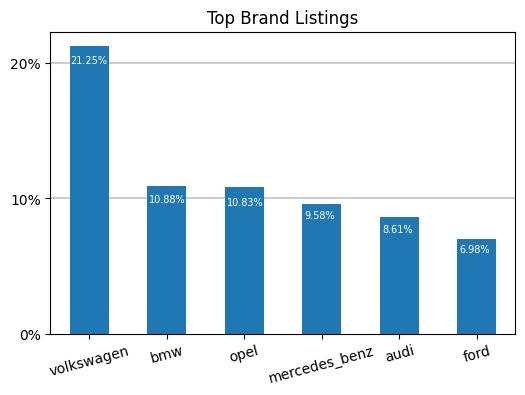

In [382]:
#print(autos['brand'].value_counts(normalize=True))
top_brands = autos['brand'].value_counts(normalize=True)
top_brands_list = top_brands[top_brands > .05].index

#print('\n')
#print('Top brands(>5% Share) in this list are: \n')
#print(list(top_brands_list))

#plot top 5 brand listings
ax = autos['brand'].value_counts(normalize=True).head(6).plot(title='Top Brand Listings',
                                                         kind='bar',
                                                         rot=15,
                                                        yticks=(0, .1, .2))
#change y tick labels to percentage
ax.set_yticklabels(['0%','10%','20%'])

#text labels for bars
ax.text(-.24, .2, '21.25%', fontsize=7, c='white')
ax.text(.77, .097, '10.88%', fontsize=7, c='white')
ax.text(1.78, .095, '10.83%', fontsize=7, c='white')
ax.text(2.78, .085, '9.58%', fontsize=7, c='white')
ax.text(3.78, .075, '8.61%', fontsize=7, c='white')
ax.text(4.78, .06, '6.98%', fontsize=7, c='white')

ax.axhline(.1, alpha=0.2, color='black', zorder=0)
ax.axhline(.2, alpha=0.2, color='black', zorder=0)

plt.savefig('top_brands.png')

<br>With brands from a global perspective, we will limit our aggregation to brands with more than a 5% share in the data set which are:

volkswagen    (21.25%)    
bmw           (10.88%)   
opel          (10.83%) <br>
mercedes_benz (09.58%) <br>
audi          (08.61%) <br>
ford          (06.98%) <br>

An initial obersation to note is that the top brands are mostly local (German) automakers

## Mean Price by Top Brands

<class 'list'>
('audi', 9239.32)
('mercedes_benz', 8528.27)
('bmw', 8284.05)
('volkswagen', 5351.4)
('ford', 3732.27)
('opel', 2952.41)


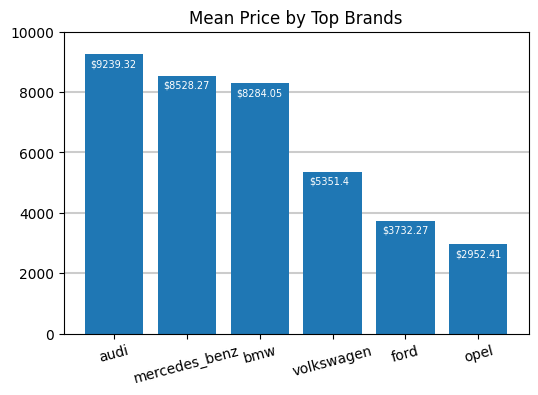

In [383]:
from collections import OrderedDict

brands = {}

#create dictionary of brands
for each in top_brands_list:
    select_rows = autos[autos['brand'] == each]
    avg_price = round(select_rows['price'].mean(), 2)
    brands[each] = avg_price

#Mean Price by Top brands, text sort
sorted_brands = sorted(brands.items(), key=lambda x: x[1], reverse = True)
print(type(sorted_brands))
for each in sorted_brands:
    print(each)

#sort dictionary for plot bar
sorted_brand_vis = OrderedDict(sorted_brands)

#-----------------

#plot bar
plt.bar(sorted_brand_vis.keys(), sorted_brand_vis.values(),zorder=2)
plt.title('Mean Price by Top Brands')
plt.xticks(rotation=15)
plt.ylim(0, 10000)

#Horizontal Lines for xticks
for each in [2000, 4000, 6000, 8000]:
    plt.axhline(each, alpha=0.2, color='black', zorder=0)


#Price in Bar
num = -0.32
for (each, number) in zip(sorted_brand_vis.keys(), range(6)):
    plt.text(num, sorted_brand_vis[each] - 400, '$' + str(sorted_brand_vis[each]), fontsize = 7, color='white')
    num += 1
plt.savefig('mean_price.png')  
plt.show()


Now that we have gathered the mean price for the top brands, we can see that:<br>
- Audi has the highest mean price at 9239 <br>
- Mercedes Benz has a mean price of 8528 <br>
- BMW has a mean price of 8284

## Mean Mileage by Top 5 brands

{'volkswagen': 128928.0, 'bmw': 132667.0, 'opel': 129416.0, 'mercedes_benz': 130962.0, 'audi': 129407.0, 'ford': 124255.0}


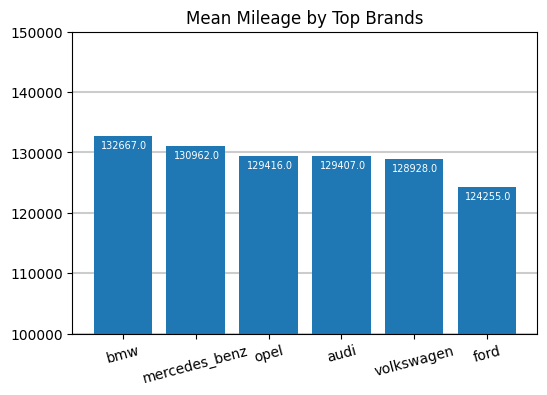

In [384]:
mileage = {}

#create mean mileage dictionary of top 5 brands
for each in top_brands_list:
    select_rows = autos[autos['brand'] == each]
    avg_km = round(select_rows['odometer_km'].mean(), 0)
    mileage[each] = avg_km
    
print(mileage)

#sort dictionary for bar plot
mileage_sort = sorted(mileage.items(), key=lambda x: x[1], reverse = True)
mileage_sorted = OrderedDict(mileage_sort)

#-----------------

#bar plot
plt.bar(mileage_sorted.keys(), mileage_sorted.values(),zorder=2)
plt.title('Mean Mileage by Top Brands')
plt.xticks(rotation=15)
plt.ylim(100000, 150000)

#bar plot tick lines
for each in [100000, 110000, 120000, 130000, 140000, 150000]:
    plt.axhline(each, alpha=0.2, color='black', zorder=0)

#Mileage in bar
num2 = -0.3
for (each, number) in zip(mileage_sorted.keys(), range(6)):
    plt.text(num2, mileage_sorted[each] - 2000, mileage_sorted[each], fontsize = 7, color='white')
    num2 += 1
    
plt.savefig('mean_mileage.png') 
plt.show()

## Mean Price vs Mean Mileage by Top 5 Brands

In [385]:
pd.concat([brands_series, mileage_series], axis = 1, keys = ['Mean Price','Mean Mileage'])

,Mean Price,Mean Mileage
volkswagen,5351.40,128928.0
bmw,8284.05,132667.0
opel,2952.41,129416.0
mercedes_benz,8528.27,130962.0
audi,9239.32,129407.0
ford,3732.27,124255.0


## Visualized

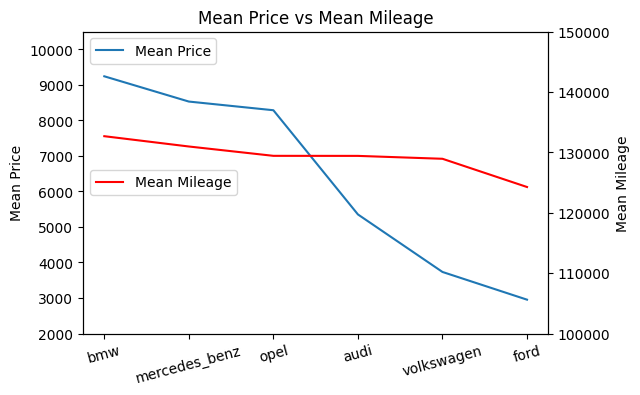

In [386]:
#plt.plot(list(sorted_brand_vis.keys()), list(sorted_brand_vis.values()))

#plt.plot(list(mileage_sorted.keys()), list(mileage_sorted.values()))

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(list(sorted_brand_vis.keys()), list(sorted_brand_vis.values()), label = 'Mean Price')
ax1.set_ylabel('Mean Price')
ax1.set_ylim(2000, 10500)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)
ax1.legend(loc=2)

ax2=ax1.twinx()
ax2.plot(list(mileage_sorted.keys()), list(mileage_sorted.values()), color='red', label = 'Mean Mileage')
ax2.set_ylim(100000, 150000)
ax2.set_ylabel('Mean Mileage')
ax2.legend(loc=6)

plt.title('Mean Price vs Mean Mileage')
plt.savefig('mean_compare.png') 
plt.show()

The table shows that in the top brands, there is a wide range in average price, and in mileage shows a narrower range.

Judging from the table this indicates that price is influenced more by the brand name than by mileage.

## Summary

- There is no relationship between mileage and price
- Brand has an influence on price.  Audi, BMW, and MC have the highest mean price as they are luxury branded cars vs Ford, Opel
- Local auto makers are favored.  Approximately 50% of listings are German brands.
    - volkswagen (21.25%)
    - bmw (10.88%)
    - opel (10.83%)
    - mercedes_benz (09.58%)
    - audi (08.61%)
    - ford (06.98%)
- 97.9% of cars were registered in the last three decades.